# LHL Capstone Project

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. First Dataset - Hourly generation numbers from 01-Jan-2023 to 30-Jun-2023

### 1.1 - Initial EDA

In [2]:
# load first dataset
df_generation = pd.read_csv('CSD Generation (Hourly) - 2023-01 to 2023-06.csv')
df_generation.head()

,Date (MST),Date (MPT),Asset Short Name,Asset Name,Asset Grouping,Volume,Maximum Capability,System Capability,Fuel Type,Sub Fuel Type,Planning Area,Region
0,2023-01-01 00:00:00,2023-01-01 00:00:00,AFG1,AFG1 APF Athabasca,AFG1,82.586120,131.0,67.0,OTHER,Wood/Refuse,27,Northeast
1,2023-01-01 01:00:00,2023-01-01 01:00:00,AFG1,AFG1 APF Athabasca,AFG1,81.336551,131.0,67.0,OTHER,Wood/Refuse,27,Northeast
2,2023-01-01 02:00:00,2023-01-01 02:00:00,AFG1,AFG1 APF Athabasca,AFG1,81.498609,131.0,67.0,OTHER,Wood/Refuse,27,Northeast
3,2023-01-01 03:00:00,2023-01-01 03:00:00,AFG1,AFG1 APF Athabasca,AFG1,81.882582,131.0,67.0,OTHER,Wood/Refuse,27,Northeast
4,2023-01-01 04:00:00,2023-01-01 04:00:00,AFG1,AFG1 APF Athabasca,AFG1,82.032287,131.0,67.0,OTHER,Wood/Refuse,27,Northeast


In [42]:
df_generation.tail()

,Date (MST),Date (MPT),Asset Short Name,Asset Name,Asset Grouping,Volume,Maximum Capability,System Capability,Fuel Type,Sub Fuel Type,Planning Area,Region
773280,2023-06-30 18:00:00,2023-06-30 19:00:00,WWD1,WWD1 Weldwood,WWD1,13.820833,50.0,10.0,OTHER,Biomass,29,Central
773281,2023-06-30 19:00:00,2023-06-30 20:00:00,WWD1,WWD1 Weldwood,WWD1,14.089166,50.0,10.0,OTHER,Biomass,29,Central
773282,2023-06-30 20:00:00,2023-06-30 21:00:00,WWD1,WWD1 Weldwood,WWD1,13.536333,50.0,10.0,OTHER,Biomass,29,Central
773283,2023-06-30 21:00:00,2023-06-30 22:00:00,WWD1,WWD1 Weldwood,WWD1,12.905833,50.0,10.0,OTHER,Biomass,29,Central
773284,2023-06-30 22:00:00,2023-06-30 23:00:00,WWD1,WWD1 Weldwood,WWD1,13.190833,50.0,10.0,OTHER,Biomass,29,Central


In [3]:
df_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773285 entries, 0 to 773284
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date (MST)          773285 non-null  object 
 1   Date (MPT)          773285 non-null  object 
 2   Asset Short Name    773285 non-null  object 
 3   Asset Name          773285 non-null  object 
 4   Asset Grouping      773285 non-null  object 
 5   Volume              773285 non-null  float64
 6   Maximum Capability  773285 non-null  float64
 7   System Capability   773285 non-null  float64
 8   Fuel Type           773285 non-null  object 
 9   Sub Fuel Type       773285 non-null  object 
 10  Planning Area       773285 non-null  int64  
 11  Region              773285 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 70.8+ MB


In [41]:
# calculate the number of NaN values for volumes
df_generation.isnull().sum()

Date (MST)            0
Date (MPT)            0
Asset Short Name      0
Asset Name            0
Asset Grouping        0
Volume                0
Maximum Capability    0
System Capability     0
Fuel Type             0
Sub Fuel Type         0
Planning Area         0
Region                0
dtype: int64

In [4]:
# convert date values to datetime Dtype
df_generation['Date (MST)'] = pd.to_datetime(df_generation['Date (MST)'])
df_generation['Date (MPT)'] = pd.to_datetime(df_generation['Date (MPT)'])

In [5]:
# confirm dtype change
df_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773285 entries, 0 to 773284
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date (MST)          773285 non-null  datetime64[ns]
 1   Date (MPT)          773285 non-null  datetime64[ns]
 2   Asset Short Name    773285 non-null  object        
 3   Asset Name          773285 non-null  object        
 4   Asset Grouping      773285 non-null  object        
 5   Volume              773285 non-null  float64       
 6   Maximum Capability  773285 non-null  float64       
 7   System Capability   773285 non-null  float64       
 8   Fuel Type           773285 non-null  object        
 9   Sub Fuel Type       773285 non-null  object        
 10  Planning Area       773285 non-null  int64         
 11  Region              773285 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(6)
memory usage: 70.8+ MB


In [15]:
df_generation.describe()

,Volume,Maximum Capability,System Capability,Planning Area
count,773285.000000,773285.000000,773285.000000,773285.000000
mean,54.493146,103.404604,100.961400,35.635644
std,105.359007,135.654632,136.202336,16.318727
min,-25.159333,5.000000,0.000000,4.000000
25%,0.000000,19.000000,16.000000,25.000000
50%,9.586333,48.000000,48.000000,39.000000
75%,55.610177,120.000000,120.000000,52.000000
max,856.374077,868.000000,868.000000,60.000000


### 1.2 - Assets, fuel type and regions EDA

#### How many unique assets are in this dataset?

In [124]:
assets = len(df_generation['Asset Name'].value_counts().index.tolist())
assets

183

#### What are the different fuel type categories?

In [35]:
fuel_types = df_generation['Fuel Type'].value_counts().index.tolist()
fuel_types

['GAS',
 'WIND',
 'SOLAR',
 'OTHER',
 'HYDRO',
 'ENERGY STORAGE',
 'COAL',
 'DUAL FUEL']

#### How many different regions are there?

In [39]:
regions = df_generation['Region'].value_counts().index.tolist()
regions

['South', 'Central', 'Northwest', 'Northeast', 'Edmonton', 'Calgary']

#### There are six different regions that assets are classified into. How many assets are in each region?

In [14]:
assets_per_region = df_generation.copy().drop_duplicates(subset=['Asset Short Name'])
assets_per_region['Region'].value_counts()

Region
South        80
Central      32
Northwest    28
Northeast    19
Edmonton     15
Calgary       9
Name: count, dtype: int64

#### The majority of assets are in the South region. Let's check to see what the breakdown of fuel types in the South region is.

In [15]:
south_region = assets_per_region[assets_per_region['Region'] == 'South']
south_region['Fuel Type'].value_counts()

Fuel Type
WIND              29
SOLAR             27
GAS               16
HYDRO              6
OTHER              1
ENERGY STORAGE     1
Name: count, dtype: int64

#### Most energy assets in the South region are clean tech (Wind and Solar). Knowing that the oil sands area is in Northern Alberta, this makes sense, but let's confirm by repeating this check for the North regions.

In [22]:
north_region = assets_per_region[(assets_per_region['Region'] == 'Northwest') | (assets_per_region['Region'] == 'Northeast')]
north_region['Fuel Type'].value_counts()

Fuel Type
GAS               35
OTHER             10
ENERGY STORAGE     2
Name: count, dtype: int64

#### As expected, no clean tech assets exist in either North sub-region. Let's next check to see what is the total system capability for each region under normal operating conditions.

In [25]:
assets_per_region.groupby('Region')['System Capability'].sum().sort_values(ascending=False)

Region
South        5878.00
Northeast    3622.00
Central      3123.70
Edmonton     2833.98
Calgary      1505.80
Northwest    1198.60
Name: System Capability, dtype: float64

#### The South region has the highest total system capability, which is correlated with having the most assets. Now, let's check to see what the average system capability is when adjusted for the number of assets in that region to determine the energy density of each region.

In [31]:
(assets_per_region.groupby('Region')['System Capability'].sum()/(assets_per_region.groupby('Region')['Fuel Type'].count())).sort_values(ascending=False)

Region
Northeast    190.631579
Edmonton     188.932000
Calgary      167.311111
Central       97.615625
South         73.475000
Northwest     42.807143
dtype: float64

#### When we analyze the regions by energy density, however, the South region has the second lowest energy density, almost 3x lower than the Northeast region. This can be attributed to clean energy assets having lower energy densities than natural gas.

#### What is the total system capability volume for each fuel type?

In [62]:
assets_per_region.groupby('Fuel Type')['System Capability'].sum().sort_values(ascending=False)

Fuel Type
GAS               10588.10
WIND               3731.00
SOLAR              1243.98
HYDRO               894.30
COAL                820.00
DUAL FUEL           466.00
OTHER               328.70
ENERGY STORAGE       90.00
Name: System Capability, dtype: float64

In [63]:
assets_per_region.groupby('Fuel Type')['Maximum Capability'].sum().sort_values(ascending=False)

Fuel Type
GAS               10904.0
WIND               3731.0
SOLAR              1248.0
HYDRO               894.0
COAL                820.0
DUAL FUEL           466.0
OTHER               444.0
ENERGY STORAGE       90.0
Name: Maximum Capability, dtype: float64

### 1.3 - Time-Series EDA

#### The dataset appears to be sorted in descending order of asset name. For analysis, create pivot table of each fuel type's volume at each hour.

In [97]:
hourly_volume_df = pd.pivot_table(df_generation, index = ['Date (MST)'], values = 'Volume', columns=['Fuel Type'], aggfunc='sum')
hourly_volume_df

Fuel Type,COAL,DUAL FUEL,ENERGY STORAGE,GAS,HYDRO,OTHER,SOLAR,WIND
Date (MST),,,,,,,,
2023-01-01 00:00:00,817.176320,464.670162,0.000000,7598.055380,116.953446,287.754563,0.000000,780.206753
2023-01-01 01:00:00,817.141767,464.099606,0.000000,7669.070478,114.114128,283.552572,0.000000,732.207446
2023-01-01 02:00:00,816.632098,464.155770,0.000000,7578.895878,121.666094,281.975430,0.000000,743.884060
2023-01-01 03:00:00,817.109768,464.372050,0.000000,7518.248410,113.459167,283.418738,0.000000,759.293766
2023-01-01 04:00:00,816.817543,463.750606,0.000000,7536.114298,139.900810,282.133304,0.000000,746.124896
...,...,...,...,...,...,...,...,...
2023-06-30 18:00:00,791.614155,465.974161,0.047222,7123.095844,624.109243,280.019205,444.602942,459.752502
2023-06-30 19:00:00,790.207208,465.677050,-0.004389,7156.218349,614.766657,290.221684,204.177766,446.869762
2023-06-30 20:00:00,792.104988,465.763883,-0.003778,7010.609269,603.492175,274.901387,13.199218,640.186719


#### Create new column that adds up the energy produced each hour

In [98]:
hourly_volume_df['Total Volume (MW)'] = hourly_volume_df[fuel_types].sum(axis=1)
hourly_volume_df

Fuel Type,COAL,DUAL FUEL,ENERGY STORAGE,GAS,HYDRO,OTHER,SOLAR,WIND,Total Volume (MW)
Date (MST),,,,,,,,,
2023-01-01 00:00:00,817.176320,464.670162,0.000000,7598.055380,116.953446,287.754563,0.000000,780.206753,10064.816624
2023-01-01 01:00:00,817.141767,464.099606,0.000000,7669.070478,114.114128,283.552572,0.000000,732.207446,10080.185996
2023-01-01 02:00:00,816.632098,464.155770,0.000000,7578.895878,121.666094,281.975430,0.000000,743.884060,10007.209331
2023-01-01 03:00:00,817.109768,464.372050,0.000000,7518.248410,113.459167,283.418738,0.000000,759.293766,9955.901898
2023-01-01 04:00:00,816.817543,463.750606,0.000000,7536.114298,139.900810,282.133304,0.000000,746.124896,9984.841457
...,...,...,...,...,...,...,...,...,...
2023-06-30 18:00:00,791.614155,465.974161,0.047222,7123.095844,624.109243,280.019205,444.602942,459.752502,10189.215274
2023-06-30 19:00:00,790.207208,465.677050,-0.004389,7156.218349,614.766657,290.221684,204.177766,446.869762,9968.134088
2023-06-30 20:00:00,792.104988,465.763883,-0.003778,7010.609269,603.492175,274.901387,13.199218,640.186719,9800.253862


#### Find the top 5 hours with the highest Total Volume

In [99]:
hourly_volume_df.sort_values('Total Volume (MW)', ascending=False)

Fuel Type,COAL,DUAL FUEL,ENERGY STORAGE,GAS,HYDRO,OTHER,SOLAR,WIND,Total Volume (MW)
Date (MST),,,,,,,,,
2023-06-25 22:00:00,1598.326415,898.748988,0.011444,12515.340401,1175.068039,515.147144,0.000000,1447.147752,18149.790184
2023-01-23 10:00:00,817.470098,465.572827,45.741942,7943.036332,140.702962,271.054301,51.532166,1923.733835,11658.844463
2023-01-04 11:00:00,814.401373,463.833160,0.000000,7677.549624,162.139227,269.446785,567.215049,1695.409923,11649.995142
2023-02-24 14:00:00,814.341375,463.992550,-5.072503,7884.296063,87.971885,261.618407,628.555724,1509.295260,11644.998762
2023-02-24 15:00:00,815.415099,463.379159,-3.862059,7773.999193,106.894894,265.549528,649.920766,1542.132724,11613.429304
...,...,...,...,...,...,...,...,...,...
2023-05-07 01:00:00,302.724660,465.472104,-0.990444,5677.246546,156.819058,209.474652,0.000000,621.639687,7432.386263
2023-05-28 05:00:00,803.744156,464.873881,-0.995889,5252.110418,182.629757,256.220025,102.951032,361.649010,7423.182391
2023-05-28 04:00:00,803.614267,464.904773,-2.725722,5331.855850,201.649363,254.425480,5.092000,356.830461,7415.646471


#### Something looks off with the volumes for June 25 at 22:00. Total volume is nearly double the next highest value, and there is no value from a date or time close as there is for Feb 24. Sort each column to see if these values are reasonable.

In [100]:
# COAL
hourly_volume_df.sort_values('COAL', ascending=False).head()

Fuel Type,COAL,DUAL FUEL,ENERGY STORAGE,GAS,HYDRO,OTHER,SOLAR,WIND,Total Volume (MW)
Date (MST),,,,,,,,,
2023-06-25 22:00:00,1598.326415,898.748988,0.011444,12515.340401,1175.068039,515.147144,0.000000,1447.147752,18149.790184
2023-05-11 07:00:00,821.208544,465.905552,-3.273611,6490.733076,248.604808,197.558225,440.170368,83.239467,8744.146428
2023-01-26 03:00:00,821.047543,465.288329,-16.060499,6008.801801,96.440690,244.448545,0.000000,2421.761178,10041.727586
2023-01-25 18:00:00,821.004379,465.615605,-18.468000,7729.617693,131.041619,296.065357,0.000000,952.982326,10377.858979
2023-05-10 12:00:00,820.982321,465.597827,0.000000,6656.412697,329.175692,218.450641,500.765348,15.849817,9007.234344


#### The total maximum capability of all coal assets is 820 MW; this value is not reasonable and will need manual adjustment.

In [101]:
# DUAL FUEL
hourly_volume_df.sort_values('DUAL FUEL', ascending=False).head()

Fuel Type,COAL,DUAL FUEL,ENERGY STORAGE,GAS,HYDRO,OTHER,SOLAR,WIND,Total Volume (MW)
Date (MST),,,,,,,,,
2023-06-25 22:00:00,1598.326415,898.748988,0.011444,12515.340401,1175.068039,515.147144,0.0,1447.147752,18149.790184
2023-01-28 01:00:00,816.530265,468.579993,-1.304999,7868.780348,102.269185,269.669179,0.0,655.614772,10180.138742
2023-01-28 02:00:00,817.077546,468.225492,-1.344222,7829.178474,99.999995,262.881059,0.0,600.249164,10076.267509
2023-01-28 03:00:00,816.649376,468.182772,-0.826222,7615.703411,101.722518,261.514524,0.0,510.290868,9773.237247
2023-01-28 06:00:00,817.006212,468.159104,0.000000,8130.708701,98.819896,298.026094,0.0,255.407237,10068.127245


#### The total maximum capability of all dual fuel assets is 466 MW; this value is not reasonable and will need manual adjustment.

In [102]:
# ENERGY STORAGE
hourly_volume_df.sort_values('ENERGY STORAGE', ascending=False).head()

Fuel Type,COAL,DUAL FUEL,ENERGY STORAGE,GAS,HYDRO,OTHER,SOLAR,WIND,Total Volume (MW)
Date (MST),,,,,,,,,
2023-01-25 12:00:00,390.398717,466.200493,74.199997,7819.634542,150.087012,302.808290,193.421778,916.353324,10313.104154
2023-01-25 11:00:00,349.881326,465.180105,74.199997,7877.586017,156.701770,308.924768,115.745584,944.257871,10292.477438
2023-01-25 10:00:00,343.651382,465.879770,73.067610,7944.203226,199.644974,307.153242,73.424654,935.896946,10342.921805
2023-01-22 16:00:00,798.537489,465.961272,70.400002,7664.637819,151.940293,264.805348,71.594813,1105.794401,10593.671436
2023-01-25 09:00:00,348.703217,465.825216,67.956111,7874.940887,155.540206,304.418734,64.469983,1137.308376,10419.162729


#### The total maximum capability of all energy storage assets is 90 MW; this value is reasonable.

In [103]:
# GAS
hourly_volume_df.sort_values('GAS', ascending=False).head()

Fuel Type,COAL,DUAL FUEL,ENERGY STORAGE,GAS,HYDRO,OTHER,SOLAR,WIND,Total Volume (MW)
Date (MST),,,,,,,,,
2023-06-25 22:00:00,1598.326415,898.748988,0.011444,12515.340401,1175.068039,515.147144,0.000000,1447.147752,18149.790184
2023-02-23 19:00:00,816.633208,463.152328,0.000000,8811.276138,218.302812,297.895176,4.171444,13.605905,10625.037013
2023-02-23 18:00:00,815.158988,464.353048,0.000000,8778.727813,268.059066,300.198068,9.749055,15.446089,10651.692127
2023-02-23 20:00:00,816.312156,463.303828,0.000000,8716.771437,220.174008,300.599188,0.000000,22.033477,10539.194094
2023-02-23 17:00:00,816.007767,464.542938,0.000000,8665.363268,282.821984,292.381752,49.301388,13.658072,10584.077169


#### The total maximum capability of all gas assets is 10,904 MW, this value is not reasonable and will need manual adjustment.

In [104]:
# HYDRO
hourly_volume_df.sort_values('HYDRO', ascending=False).head()

Fuel Type,COAL,DUAL FUEL,ENERGY STORAGE,GAS,HYDRO,OTHER,SOLAR,WIND,Total Volume (MW)
Date (MST),,,,,,,,,
2023-06-25 22:00:00,1598.326415,898.748988,0.011444,12515.340401,1175.068039,515.147144,0.000000,1447.147752,18149.790184
2023-06-26 15:00:00,797.074988,462.761938,0.002444,7304.069958,690.780322,241.054960,939.765948,53.404075,10488.914634
2023-06-26 16:00:00,794.573542,462.573105,0.002167,7408.687609,689.732919,240.218852,858.245788,23.863807,10477.897789
2023-06-26 14:00:00,797.653655,463.126106,0.000667,7062.926390,662.033012,242.102341,999.045361,42.936763,10269.824295
2023-06-23 18:00:00,798.056154,464.547828,-0.845000,6553.472213,656.645060,259.778286,641.026582,307.076796,9679.757918


#### The total maximum capability of all hydro assets is 894 MW; this value is not reasonable and will need manual adjustment.

In [105]:
# OTHER
hourly_volume_df.sort_values('OTHER', ascending=False).head()

Fuel Type,COAL,DUAL FUEL,ENERGY STORAGE,GAS,HYDRO,OTHER,SOLAR,WIND,Total Volume (MW)
Date (MST),,,,,,,,,
2023-06-25 22:00:00,1598.326415,898.748988,0.011444,12515.340401,1175.068039,515.147144,0.000000,1447.147752,18149.790184
2023-03-27 20:00:00,812.560209,465.008882,0.000000,7772.500943,128.921608,336.669533,0.408909,70.986775,9587.056859
2023-03-27 21:00:00,785.920821,465.161715,0.000000,7548.564661,116.604531,336.422619,0.048615,93.520962,9346.243924
2023-03-27 19:00:00,813.458210,465.147773,0.000000,7864.407946,179.552839,336.379700,0.408909,48.667132,9708.022508
2023-03-27 04:00:00,764.037155,465.578770,0.000000,7287.857545,135.726588,335.282567,0.000000,49.950620,9038.433244


#### The total maximum capability of all "other" assets is 444 MW; this value is not reasonable and will need manual adjustment.

In [106]:
# SOLAR
hourly_volume_df.sort_values('SOLAR', ascending=False).head()

Fuel Type,COAL,DUAL FUEL,ENERGY STORAGE,GAS,HYDRO,OTHER,SOLAR,WIND,Total Volume (MW)
Date (MST),,,,,,,,,
2023-05-30 10:00:00,798.457044,464.780550,0.010500,5671.680630,360.266669,262.938279,1127.707101,627.864117,9313.704890
2023-06-22 10:00:00,802.065154,464.589883,0.008000,6349.154640,651.453552,226.608741,1117.544015,187.810847,9799.234833
2023-06-04 13:00:00,804.038546,464.483940,0.009167,6258.715052,277.215517,254.818190,1112.223044,395.727956,9567.231413
2023-06-04 12:00:00,796.570547,464.487829,-0.297278,6050.922378,239.351391,245.644754,1111.584455,418.615401,9326.879477
2023-05-30 11:00:00,798.896208,464.969273,0.001556,5812.842368,367.863569,269.225679,1108.434730,603.506567,9425.739951


#### The total maximum capability of all solar assets is 1,248 MW; this value is reasonable.

In [107]:
# WIND
hourly_volume_df.sort_values('WIND', ascending=False).head()

Fuel Type,COAL,DUAL FUEL,ENERGY STORAGE,GAS,HYDRO,OTHER,SOLAR,WIND,Total Volume (MW)
Date (MST),,,,,,,,,
2023-04-08 20:00:00,639.750712,465.403327,0.000000,5610.691032,130.583712,257.533953,0.0,2824.874941,9928.837676
2023-04-09 01:00:00,406.663327,465.292215,0.000000,5390.680817,104.942698,254.659780,0.0,2806.504006,9428.742842
2023-04-08 23:00:00,508.994213,465.875938,0.000000,5348.342805,119.018572,255.719340,0.0,2795.389370,9493.340238
2023-04-08 21:00:00,608.467435,465.445438,0.024333,5576.745789,185.809836,255.019822,0.0,2784.737182,9876.249837
2023-04-09 00:00:00,424.674493,465.724716,0.000000,5449.491387,115.200932,254.961407,0.0,2772.611408,9482.664344


#### The total maximum capability of all wind assets is 3,731 MW; this value is reasonable.

**Values for June 25 at 22:00 need to be adjusted for other, hydro, gas, dual fuel, and coal fuel types.**

In [ ]:
# convert the index to a datetime column dtype to filter for the values that need adjustment
hourly_volume_df.index = pd.to_datetime(hourly_volume_df.index)
hourly_volume_df.loc[(hourly_volume_df.index >= '2023-06-24 22:00') & (hourly_volume_df.index <= '2023-06-26 22:00')]

#### Go back to first dataframe and observe all data for the time in question for outliers.

In [121]:
june_25 = df_generation.loc[df_generation['Date (MST)'] == '2023-06-25 22:00']
june_25.sort_values('Volume', ascending = False)

,Date (MST),Date (MPT),Asset Short Name,Asset Name,Asset Grouping,Volume,Maximum Capability,System Capability,Fuel Type,Sub Fuel Type,Planning Area,Region
420227,2023-06-25 22:00:00,2023-06-25 23:00:00,EGC1,EGC1 Shepard,EGC1,640.425430,868.0,868.0,GAS,COMBINED_CYCLE,6,Calgary
758499,2023-06-25 22:00:00,2023-06-25 23:00:00,EGC1,EGC1 Shepard,EGC1,640.425430,868.0,868.0,GAS,COMBINED_CYCLE,6,Calgary
760677,2023-06-25 22:00:00,2023-06-25 23:00:00,GN3,GN3 Genesee #3,GN3,449.374494,466.0,466.0,DUAL FUEL,DUAL FUEL,40,Edmonton
468066,2023-06-25 22:00:00,2023-06-25 23:00:00,GN3,GN3 Genesee #3,GN3,449.374494,466.0,466.0,DUAL FUEL,DUAL FUEL,40,Edmonton
763944,2023-06-25 22:00:00,2023-06-25 23:00:00,KH3,KH3 Keephills #3,KH3,421.554772,463.0,463.0,GAS,GAS_FIRED_STEAM,40,Edmonton
...,...,...,...,...,...,...,...,...,...,...,...,...
754990,2023-06-25 22:00:00,2023-06-25 23:00:00,CHP1,CHP1 Chappice Lake,CHP1,0.000000,14.0,14.0,SOLAR,SOLAR,4,South
347245,2023-06-25 22:00:00,2023-06-25 23:00:00,CLR2,CLR2 Claresholm,CLR2,0.000000,75.0,75.0,SOLAR,SOLAR,49,South
437189,2023-06-25 22:00:00,2023-06-25 23:00:00,ERV2,ERV2 eReserve2 Buffalo Creek,ERV2,0.000000,20.0,20.0,ENERGY STORAGE,ENERGY STORAGE,32,Central
755353,2023-06-25 22:00:00,2023-06-25 23:00:00,CLR2,CLR2 Claresholm,CLR2,0.000000,75.0,75.0,SOLAR,SOLAR,49,South


#### There are 183 assets in this dataset, yet the above data frame shows 364 records for 1 hour, and we can see that there are duplicated rows. Check how many rows are returned for June 24 and 26

In [122]:
# June 24
june_24 = df_generation.loc[df_generation['Date (MST)'] == '2023-06-24 22:00']
june_24.sort_values('Volume', ascending = False)

,Date (MST),Date (MPT),Asset Short Name,Asset Name,Asset Grouping,Volume,Maximum Capability,System Capability,Fuel Type,Sub Fuel Type,Planning Area,Region
420203,2023-06-24 22:00:00,2023-06-24 23:00:00,EGC1,EGC1 Shepard,EGC1,649.203740,868.0,868.0,GAS,COMBINED_CYCLE,6,Calgary
468042,2023-06-24 22:00:00,2023-06-24 23:00:00,GN3,GN3 Genesee #3,GN3,461.520771,466.0,466.0,DUAL FUEL,DUAL FUEL,40,Edmonton
541144,2023-06-24 22:00:00,2023-06-24 23:00:00,KH3,KH3 Keephills #3,KH3,434.641217,463.0,463.0,GAS,GAS_FIRED_STEAM,40,Edmonton
637926,2023-06-24 22:00:00,2023-06-24 23:00:00,SCL1,SCL1 Syncrude #1,SCL1,420.030548,510.0,510.0,GAS,COGENERATION,25,Northeast
462428,2023-06-24 22:00:00,2023-06-24 23:00:00,GN1,GN1 Genesee #1,GN1,401.062047,400.0,400.0,COAL,COAL,40,Edmonton
...,...,...,...,...,...,...,...,...,...,...,...,...
451200,2023-06-24 22:00:00,2023-06-24 23:00:00,FNG1,FNG1 Fort Nelson,FNG1,0.000000,73.0,73.0,GAS,COMBINED_CYCLE,17,Northwest
442779,2023-06-24 22:00:00,2023-06-24 23:00:00,ERV5,ERV5 eReserve5 Hughenden,ERV5,0.000000,20.0,20.0,ENERGY STORAGE,ENERGY STORAGE,37,Central
439972,2023-06-24 22:00:00,2023-06-24 23:00:00,ERV3,ERV3 eReserve3 Mercer Hill,ERV3,0.000000,20.0,20.0,ENERGY STORAGE,ENERGY STORAGE,20,Northwest
437165,2023-06-24 22:00:00,2023-06-24 23:00:00,ERV2,ERV2 eReserve2 Buffalo Creek,ERV2,0.000000,20.0,20.0,ENERGY STORAGE,ENERGY STORAGE,32,Central


In [125]:
# June 26
june_26 = df_generation.loc[df_generation['Date (MST)'] == '2023-06-26 22:00']
june_26.sort_values('Volume', ascending = False)

,Date (MST),Date (MPT),Asset Short Name,Asset Name,Asset Grouping,Volume,Maximum Capability,System Capability,Fuel Type,Sub Fuel Type,Planning Area,Region
758523,2023-06-26 22:00:00,2023-06-26 23:00:00,EGC1,EGC1 Shepard,EGC1,720.965525,868.0,868.0,GAS,COMBINED_CYCLE,6,Calgary
760701,2023-06-26 22:00:00,2023-06-26 23:00:00,GN3,GN3 Genesee #3,GN3,463.426383,466.0,466.0,DUAL FUEL,DUAL FUEL,40,Edmonton
768203,2023-06-26 22:00:00,2023-06-26 23:00:00,SCL1,SCL1 Syncrude #1,SCL1,410.838297,510.0,510.0,GAS,COGENERATION,25,Northeast
763968,2023-06-26 22:00:00,2023-06-26 23:00:00,KH3,KH3 Keephills #3,KH3,405.283714,463.0,463.0,GAS,GAS_FIRED_STEAM,40,Edmonton
760459,2023-06-26 22:00:00,2023-06-26 23:00:00,GN1,GN1 Genesee #1,GN1,399.135938,400.0,400.0,COAL,COAL,40,Edmonton
...,...,...,...,...,...,...,...,...,...,...,...,...
760217,2023-06-26 22:00:00,2023-06-26 23:00:00,GEN5,GEN5 Carson Creek,GEN5,0.000000,15.0,15.0,GAS,SIMPLE_CYCLE,26,Northwest
759975,2023-06-26 22:00:00,2023-06-26 23:00:00,FNG1,FNG1 Fort Nelson,FNG1,0.000000,73.0,73.0,GAS,COMBINED_CYCLE,17,Northwest
759612,2023-06-26 22:00:00,2023-06-26 23:00:00,ERV5,ERV5 eReserve5 Hughenden,ERV5,0.000000,20.0,20.0,ENERGY STORAGE,ENERGY STORAGE,37,Central
773188,2023-06-26 22:00:00,2023-06-26 23:00:00,WWD1,WWD1 Weldwood,WWD1,0.000000,50.0,10.0,OTHER,Biomass,29,Central


#### Remove the duplicated rows for June 25 at 22:00 by creating a new dataframe from the original and removing rows where the asset name shows up at the same time more than once

In [127]:
df_generation_2 = df_generation.drop_duplicates(subset=['Date (MST)', 'Asset Short Name'], keep = 'first').reset_index(drop = True)
# from the new dataframe, repeat the above test to see how many rows are returned
june_25_2 = df_generation_2.loc[df_generation_2['Date (MST)'] == '2023-06-25 22:00']
june_25_2.sort_values('Volume', ascending = False)

,Date (MST),Date (MPT),Asset Short Name,Asset Name,Asset Grouping,Volume,Maximum Capability,System Capability,Fuel Type,Sub Fuel Type,Planning Area,Region
420227,2023-06-25 22:00:00,2023-06-25 23:00:00,EGC1,EGC1 Shepard,EGC1,640.425430,868.0,868.0,GAS,COMBINED_CYCLE,6,Calgary
468066,2023-06-25 22:00:00,2023-06-25 23:00:00,GN3,GN3 Genesee #3,GN3,449.374494,466.0,466.0,DUAL FUEL,DUAL FUEL,40,Edmonton
541168,2023-06-25 22:00:00,2023-06-25 23:00:00,KH3,KH3 Keephills #3,KH3,421.554772,463.0,463.0,GAS,GAS_FIRED_STEAM,40,Edmonton
637950,2023-06-25 22:00:00,2023-06-25 23:00:00,SCL1,SCL1 Syncrude #1,SCL1,415.500345,510.0,510.0,GAS,COGENERATION,25,Northeast
462452,2023-06-25 22:00:00,2023-06-25 23:00:00,GN1,GN1 Genesee #1,GN1,402.335326,400.0,400.0,COAL,COAL,40,Edmonton
...,...,...,...,...,...,...,...,...,...,...,...,...
451224,2023-06-25 22:00:00,2023-06-25 23:00:00,FNG1,FNG1 Fort Nelson,FNG1,0.000000,73.0,73.0,GAS,COMBINED_CYCLE,17,Northwest
439996,2023-06-25 22:00:00,2023-06-25 23:00:00,ERV3,ERV3 eReserve3 Mercer Hill,ERV3,0.000000,20.0,20.0,ENERGY STORAGE,ENERGY STORAGE,20,Northwest
437189,2023-06-25 22:00:00,2023-06-25 23:00:00,ERV2,ERV2 eReserve2 Buffalo Creek,ERV2,0.000000,20.0,20.0,ENERGY STORAGE,ENERGY STORAGE,32,Central
434382,2023-06-25 22:00:00,2023-06-25 23:00:00,ERV1,ERV1 eReserve1 Rycroft,ERV1,0.000000,20.0,20.0,ENERGY STORAGE,ENERGY STORAGE,20,Northwest


#### Now, repeat pivot table process with new dataframe to confirm outliers are removed

In [128]:
hourly_volume_df_2 = pd.pivot_table(df_generation_2, index = ['Date (MST)'], values = 'Volume', columns=['Fuel Type'], aggfunc='sum')
hourly_volume_df_2

Fuel Type,COAL,DUAL FUEL,ENERGY STORAGE,GAS,HYDRO,OTHER,SOLAR,WIND
Date (MST),,,,,,,,
2023-01-01 00:00:00,817.176320,464.670162,0.000000,7598.055380,116.953446,287.754563,0.000000,780.206753
2023-01-01 01:00:00,817.141767,464.099606,0.000000,7669.070478,114.114128,283.552572,0.000000,732.207446
2023-01-01 02:00:00,816.632098,464.155770,0.000000,7578.895878,121.666094,281.975430,0.000000,743.884060
2023-01-01 03:00:00,817.109768,464.372050,0.000000,7518.248410,113.459167,283.418738,0.000000,759.293766
2023-01-01 04:00:00,816.817543,463.750606,0.000000,7536.114298,139.900810,282.133304,0.000000,746.124896
...,...,...,...,...,...,...,...,...
2023-06-30 18:00:00,791.614155,465.974161,0.047222,7123.095844,624.109243,280.019205,444.602942,459.752502
2023-06-30 19:00:00,790.207208,465.677050,-0.004389,7156.218349,614.766657,290.221684,204.177766,446.869762
2023-06-30 20:00:00,792.104988,465.763883,-0.003778,7010.609269,603.492175,274.901387,13.199218,640.186719


In [129]:
hourly_volume_df_2['Total Volume (MW)'] = hourly_volume_df_2[fuel_types].sum(axis=1)
hourly_volume_df_2

Fuel Type,COAL,DUAL FUEL,ENERGY STORAGE,GAS,HYDRO,OTHER,SOLAR,WIND,Total Volume (MW)
Date (MST),,,,,,,,,
2023-01-01 00:00:00,817.176320,464.670162,0.000000,7598.055380,116.953446,287.754563,0.000000,780.206753,10064.816624
2023-01-01 01:00:00,817.141767,464.099606,0.000000,7669.070478,114.114128,283.552572,0.000000,732.207446,10080.185996
2023-01-01 02:00:00,816.632098,464.155770,0.000000,7578.895878,121.666094,281.975430,0.000000,743.884060,10007.209331
2023-01-01 03:00:00,817.109768,464.372050,0.000000,7518.248410,113.459167,283.418738,0.000000,759.293766,9955.901898
2023-01-01 04:00:00,816.817543,463.750606,0.000000,7536.114298,139.900810,282.133304,0.000000,746.124896,9984.841457
...,...,...,...,...,...,...,...,...,...
2023-06-30 18:00:00,791.614155,465.974161,0.047222,7123.095844,624.109243,280.019205,444.602942,459.752502,10189.215274
2023-06-30 19:00:00,790.207208,465.677050,-0.004389,7156.218349,614.766657,290.221684,204.177766,446.869762,9968.134088
2023-06-30 20:00:00,792.104988,465.763883,-0.003778,7010.609269,603.492175,274.901387,13.199218,640.186719,9800.253862


In [130]:
hourly_volume_df_2.sort_values('Total Volume (MW)', ascending=False)

Fuel Type,COAL,DUAL FUEL,ENERGY STORAGE,GAS,HYDRO,OTHER,SOLAR,WIND,Total Volume (MW)
Date (MST),,,,,,,,,
2023-01-23 10:00:00,817.470098,465.572827,45.741942,7943.036332,140.702962,271.054301,51.532166,1923.733835,11658.844463
2023-01-04 11:00:00,814.401373,463.833160,0.000000,7677.549624,162.139227,269.446785,567.215049,1695.409923,11649.995142
2023-02-24 14:00:00,814.341375,463.992550,-5.072503,7884.296063,87.971885,261.618407,628.555724,1509.295260,11644.998762
2023-02-24 15:00:00,815.415099,463.379159,-3.862059,7773.999193,106.894894,265.549528,649.920766,1542.132724,11613.429304
2023-01-06 11:00:00,814.999049,464.255827,-0.145445,7474.224570,135.156134,277.096481,504.583993,1928.993158,11599.163767
...,...,...,...,...,...,...,...,...,...
2023-05-07 01:00:00,302.724660,465.472104,-0.990444,5677.246546,156.819058,209.474652,0.000000,621.639687,7432.386263
2023-05-28 05:00:00,803.744156,464.873881,-0.995889,5252.110418,182.629757,256.220025,102.951032,361.649010,7423.182391
2023-05-28 04:00:00,803.614267,464.904773,-2.725722,5331.855850,201.649363,254.425480,5.092000,356.830461,7415.646471


#### Removing the duplicated rows appears to have worked; continue EDA analysis using this dataframe.

In [132]:
hourly_volume_df_2.describe()

Fuel Type,COAL,DUAL FUEL,ENERGY STORAGE,GAS,HYDRO,OTHER,SOLAR,WIND,Total Volume (MW)
count,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000
mean,746.367270,459.965954,-0.424650,6726.520055,201.715021,252.424441,276.865369,1036.820594,9700.254054
std,124.481197,32.410383,5.460892,893.930002,123.785300,37.940479,364.363541,714.410373,899.522262
min,261.151496,0.000000,-25.269610,4323.263267,55.820617,127.428406,-0.244513,3.305500,7396.399944
25%,762.413960,464.612160,-1.053194,6077.998118,124.073841,233.495164,0.000000,392.362842,9051.031048
50%,798.660880,465.184512,0.000000,6775.545045,161.200399,260.240773,15.900611,939.408382,9811.268736
75%,815.077238,465.694577,0.000000,7418.530253,230.429209,278.075173,547.295895,1629.894398,10379.735340
max,821.208544,468.579993,74.199997,8811.276138,690.780322,336.669533,1127.707101,2824.874941,11658.844463


#### From the above table, we can extract the following information:

1. The average hourly total volume production is 9.7 GW
2. On average, Natural Gas plants account for 69.3% of energy production each hour
3. At their maximum combined volumes (assuming the date and time are the same), solar and wind could only theoretically currently generate 40% of the average power required from the grid

### 1.4 - Visualisations for first dataset

In [134]:
hourly_volume_df_2.index = pd.to_datetime(hourly_volume_df_2.index)

#### Create a plot that shows the volume generated by each fuel type from 01-Jan-2023 to 30-Jun-2023

<Axes: xlabel='Date (MST)', ylabel='Volume'>

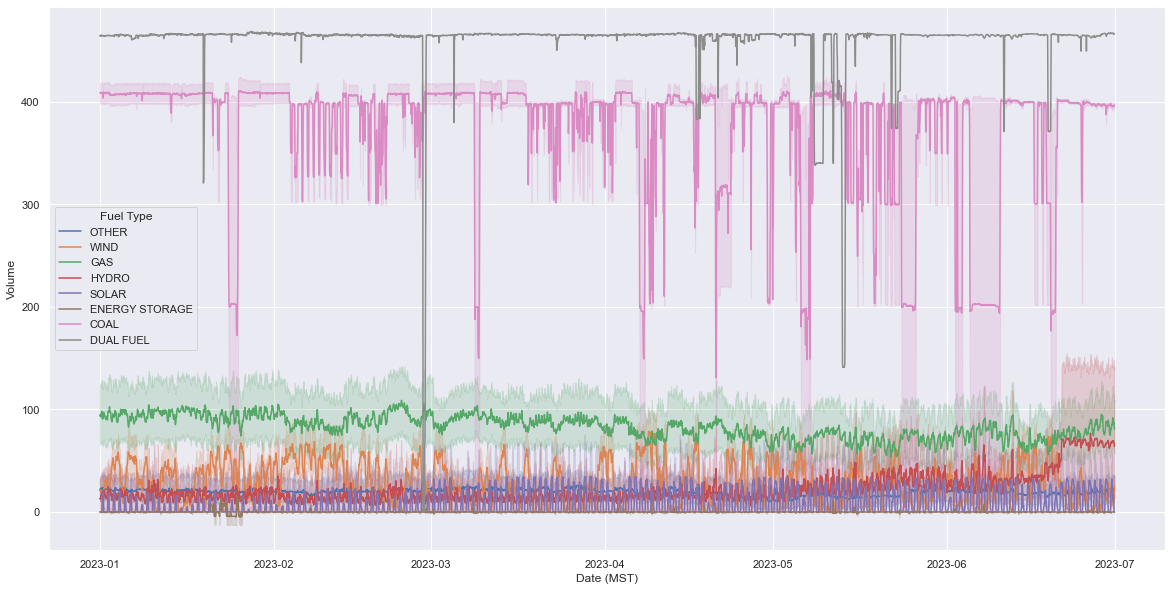

In [136]:
# Visualize the different fuel types
sns.set(rc={'figure.figsize': (20,10)})
sns.lineplot(data=df_generation_2, x='Date (MST)', y='Volume', hue='Fuel Type')

## 2. Hourly Metered Volumes

### 2.1 - Initial EDA

In [159]:
# load second dataset which shows the Total Net Generation (MW) produced by each energy asset in Alberta
df_price = pd.read_csv('Hourly_Metered_Volumes_and_Pool_Price_and_AIL.csv')
df_price.shape

(119040, 213)

In [139]:
# display all columns
pd.set_option('display.max_columns', None)
df_price.head()

,Date_Begin_GMT,Date_Begin_Local,AFG1,AKE1,ALP1,ALP2,APS1,BCR2,BCRK,BIG,BOW1,BR3,BR4,BR5,BRA,BTR1,CAL1,CHIN,CMH1,CNR5,CR1,CRS1,CRS2,CRS3,CRW1,DAI1,DKSN,DOWG,DRW1,DV1,EAGL,EC01,EC04,ENC1,ENC2,ENC3,FNG1,GN1,GN2,GN3,GOC1,GPEC,GWW1,HRM,ICP1,IEW1,IOR1,JOF1,KH1,KH2,KHW1,ME02,ME03,ME04,MEG1,MKR1,MKRC,NPC1,NPP1,NX01,NX02,OMRH,PH1,PR1,PW01,RB1,RB2,RB3,RB5,RG10,RG8,RG9,RL1,RYMD,SCL1,SCR1,SCR2,SCR3,SD1,SD2,SD3,SD4,SD5,SD6,SH1,SH2,SHCG,ST1,ST2,TAB1,TAY1,TAY2,TC01,TC02,TLM2,UOA1,VVW1,VVW2,WB4,WEY1,WST1,WWD1,WWD2,IEW2,HMT1,ARD1,NEP1,KH3,UOC1,SCR4,CRR1,GEN6,HAL1,NRG3,ANC1,GEN5,BSR1,EGC1,OWF1,PEC1,WCD1,CRG1,HSM1,MFG1,NAT1,BUL1,BUL2,SDH1,SLP1,BON1,CL01,FH1,BSC1,MUL1,BHL1,BFD1,WHT1,CRR2,RIV1,COD1,VXH1,HUL1,INF1,PMB1,SUM1,IOR4,SUF1,ERV1,CLR1,CLR2,BRD1,BUR1,SET1,WEF1,WRW1,HYS1,JER1,WHT2,ERV2,HRT1,RTL1,TVS1,NPC3,STR1,STR2,BRK1,BRK2,COL1,NMK1,MON1,CRD1,CRD2,WHE1,KKP1,KKP2,FMG1,ERV3,SRL1,EPS1,VNC1,HHW1,CLY1,CLY2,CYP2,HRV1,MIC1,TRH1,HLD1,CYP1,LAN1,JNR3,GDP1,GRZ1,BLS1,ERV5,CHP1,MCH1,STV1,EMP1,HRV2,SWP1,DFT1,YNG1,WLC1,ACTUAL_POOL_PRICE,ACTUAL_AIL,DAY_AHEAD_POOL_PRICE,EXPORT_BC,EXPORT_MT,EXPORT_SK,IMPORT_BC,IMPORT_MT,IMPORT_SK
0,1/1/2010 7:00,1/1/2010 0:00,5.2305,0.0,0.0,0.0,0.0,11.8714,0.0,26.573744,42.754208,149.1570,156.2886,383.1201,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.394,4.7568,126.860491,0.0,7.1244,24.437387,40.6058,19.116,0.0,0.0,0.0,13.05024,390.362194,388.703406,450.0084,2.9862,14.4051,0.0,125.467731,0.0,0.0,52.5424,55.63535,346.22508,0.870919,0.0,0.0,0.0,0.0,84.096,50.3675,170.5408,0.0,0.0,76.3530,23.588,3.3606,0.0,15.7386,5.5143,0.0,0.0,0.0,13.904,0.0,0.0,0.0,43.540,0.0,45.296,188.216,2.932,10.9994,258.17587,260.49263,313.53413,356.57294,354.72894,377.50926,389.2154,390.2738,0.0,0.0,0.0,21.890401,0.0,0.431,62.9434,20.0840,10.8225,0.0,0.252,0.0,250.15377,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.12,8307,49.68,125,NaN,0,50,NaN,44
1,1/1/2010 8:00,1/1/2010 1:00,5.2360,0.0,0.0,0.0,0.0,11.8580,0.0,26.753066,42.066657,149.7589,155.4531,382.9625,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.856,4.7568,118.038190,0.0,6.0588,23.965469,25.0991,18.800,0.0,0.0,0.0,13.27632,391.990632,388.673368,450.3962,2.9070,14.4389,0.0,125.404366,0.0,0.0,52.8890,6.98300,354.95541,0.000000,0.0,0.0,0.0,0.0,84.304,52.5751,170.4663,0.0,0.0,55.4279,21.658,3.3606,0.0,15.9696,5.5105,0.0,0.0,0.0,12.328,0.0,0.0,0.0,43.610,0.0,35.872,181.352,7.354,13.9316,260.65199,260.63678,312.28792,355.43224,355.09084,372.03859,389.5040,390.2738,0.0,0.0,0.0,34.834801,0.0,1.431,63.1390,20.6595,10.8170,0.0,0.000,0.0,250.92031,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.79,8186,38.00,125,NaN,0,0,NaN,45
2,1/1/2010 9:00,1/1/2010 2:00,5.5605,0.0,0.0,0.0,0.0,11.8566,0.0,26.544753,45.459836,149.2844,151.4950,376.4841,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.226,4.7568,84.194438,0.0,7.2900,24.471967,8.5649,18.716,0.0,0.0,0.0,13.37832,392.053344,388.735456,450.0711,2.9610,14.7085,0.0,126.500882,0.0,0.0,52.3071,5.26648,356.76656,0.000000,0.0,0.0,0.0,0.0,83.984,49.3939,170.4563,0.0,0.0,58.6236,26.378,3.3366,0.0,15.5492,5.5211,0.0,0.0,0.0,8.684,0.0,0.0,0.0,43.582,0.0,37.328,165.088,24.438,20.6898,257.58459,253.45023,313.54758,336.47152,354.28603,318.66844,389.7923,390.2738,0.0,0.0,0.0,29.849401,0.0,2.014,63.2170,20.5360,10.7945,0.0,0.00

In [158]:
df_price.tail()

,Date_Begin_Local,AFG1,AKE1,ALP1,ALP2,APS1,BCR2,BCRK,BIG,BOW1,BR3,BR4,BR5,BRA,BTR1,CAL1,CHIN,CMH1,CNR5,CR1,CRS1,CRS2,CRS3,CRW1,DAI1,DKSN,DOWG,DRW1,DV1,EAGL,EC01,EC04,ENC1,ENC2,ENC3,FNG1,GN1,GN2,GN3,GOC1,GPEC,GWW1,HRM,ICP1,IEW1,IOR1,JOF1,KH1,KH2,KHW1,ME02,ME03,ME04,MEG1,MKR1,MKRC,NPC1,NPP1,NX01,NX02,OMRH,PH1,PR1,PW01,RB1,RB2,RB3,RB5,RG10,RG8,RG9,RL1,RYMD,SCL1,SCR1,SCR2,SCR3,SD1,SD2,SD3,SD4,SD5,SD6,SH1,SH2,SHCG,ST1,ST2,TAB1,TAY1,TAY2,TC01,TC02,TLM2,UOA1,VVW1,VVW2,WB4,WEY1,WST1,WWD1,WWD2,IEW2,HMT1,ARD1,NEP1,KH3,UOC1,SCR4,CRR1,GEN6,HAL1,NRG3,ANC1,GEN5,BSR1,EGC1,OWF1,PEC1,WCD1,CRG1,HSM1,MFG1,NAT1,BUL1,BUL2,SDH1,SLP1,BON1,CL01,FH1,BSC1,MUL1,BHL1,BFD1,WHT1,CRR2,RIV1,COD1,VXH1,HUL1,INF1,PMB1,SUM1,IOR4,SUF1,ERV1,CLR1,CLR2,BRD1,BUR1,SET1,WEF1,WRW1,HYS1,JER1,WHT2,ERV2,HRT1,RTL1,TVS1,NPC3,STR1,STR2,BRK1,BRK2,COL1,NMK1,MON1,CRD1,CRD2,WHE1,KKP1,KKP2,FMG1,ERV3,SRL1,EPS1,VNC1,HHW1,CLY1,CLY2,CYP2,HRV1,MIC1,TRH1,HLD1,CYP1,LAN1,JNR3,GDP1,GRZ1,BLS1,ERV5,CHP1,MCH1,STV1,EMP1,HRV2,SWP1,DFT1,YNG1,WLC1,ACTUAL_POOL_PRICE,ACTUAL_AIL,EXPORT_BC,EXPORT_MT,EXPORT_SK,IMPORT_BC,IMPORT_MT,IMPORT_SK
119035,7/31/2023 20:00,18.2925,11.8928,5.1280,6.6640,0.0,31.217982,52.710018,85.017730,59.633204,0.0,0.0,176.687317,23.251320,10.736,256.6116,11.376,105.1604,0.0,4.9590,39.508907,38.957733,0.0,6.200,20.1488,11.3699,147.281550,0.0,0.0,23.059,87.240,0.0,35.228626,84.390761,93.067822,0.0,400.195049,395.196951,465.044,0.0,11.969,7.760,0.0,5.8795,19.3706,141.385420,207.10547,0.0,199.85553,14.714945,6.8694,6.2788,5.5546,92.9931,0.0187,155.392,9.22752,77.490,94.144,108.360,25.639363,0.0,0.0,0.0,0.0,0.0,0.0,31.0968,0.0,0.0,0.0,0.0,18.080,108.800,276.052,0.3542,0.4906,0.0,0.0,0.0,0.0,0.0,283.12426,240.346219,238.666217,0.0,0.0,0.0,2.432210,13.276,0.0,74.944,21.7164,8.500,0.0,0.0,42.112,0.0,5.5790,10.768,0.0,0.0,14.4825,19.252,13.200,37.824,462.6756,0.896750,29.392,19.079088,7.52736,20.112,0.0,20.536905,11.6667,56.0640,774.414934,17.2400,0.54648,18.74880,2.6875,0.0,0.0,14.9040,2.136,3.416,9.6492,0.0,0.0,0.0,0.0,0.2740,2.6576,0.0,2.032,8.636,11.876912,26.2512,4.4386,1.9617,1.7425,1.6625,0.027984,0.0,0.0,2.042,0.0,2.0540,2.7460,0.3048,0.392,13.246100,0.6720,16.8870,3.2320,2.552,9.520,0.0,64.832,1.664,63.4240,9.3582,1.280,1.7600,1.2672,1.6512,0.9320,2.2344,0.9820,0.0,1.7920,7.5776,0.0,0.0,11.616,0.0,11.7888,0.0,1.0620,19.551,6.1280,3.5045,0.116,9.5505,2.988,3.1536,12.2705,0.0000,13.424,10.0125,40.3805,52.4200,0.729951,0.0776,0.0,0.0,0.0,0.0028,10.2526,0.0,0.0,0.0,0.0,292.85,10233,0,26.0,90,427,0.0,0
119036,7/31/2023 21:00,18.0205,14.9536,6.1680,6.6880,0.0,31.203876,52.996124,35.086668,51.480938,0.0,0.0,176.707894,20.431939,10.112,251.2934,11.360,117.0903,0.0,1.5526,15.891784,2.933670,0.0,4.408,20.7186,11.3718,144.355273,0.0,0.0,22.392,83.406,0.0,35.257291,85.456985,93.966671,0.0,399.873546,394.798454,464.944,0.0,12.222,14.808,0.0,5.8720,27.1714,144.607220,175.46492,0.0,199.89075,23.663189,7.0802,6.3599,5.5884,94.0504,0.0000,154.944,9.24048,75.600,95.936,110.148,25.629569,0.0,0.0,0.0,0.0,0.0,0.0,0.0042,0.0,0.0,0.0,0.0,18.096,94.656,268.324,0.4626,0.3887,0.0,0.0,0.0,0.0,0.0,284.47469,240.341796,238.661795,0.0,0.0,0.0,1.197900,13.272,0.0,77.248,22.5999,8.608,0.0,0.0,41.944,0.0,5.3788,10.524,0.0,0.0,15.3735,20.208,17.292,27.520,462.5615,2.747963,43.800,18.275277,7.54560,26.464,0.0,11.954522,11.9774,18.1655,748.328098,0.2975,0.54360,18.76032,2.8090,0.0,0.0,14.9200,4.904,7.088,9.6452,0.0,0.0,0.0,0.0,0.0049,2.6584,0.0,2.840,26.516,10.263723,34.0288,4.4168,0.0123,0.0214,0.0757,0.023978,0.0,0.0,0.020,0.0,0.0512,0.0768,0.0000,0.000,13.259660,0.0056,7.3045,0.0085,0.003,26.448,0.0,65.056,6.016,0.8145,9.3600,0.024,0.0285,0.0072,0.0096,0.0014,0.0264,0.0185,0.0,0.0088,37.7320,0.0,0.0,28.416,0.0,11.9184,0.0,0.0229,38.549,0.0675,0.0415,0.808,9.5540,0.054,0.0792,12.6257,3.2791,34.304,41.4473,52.2100,88.8785,0.021723,0.0780,0.0,0.0,0.0,0.0022,10.2504,0.0,0.0,0.0,0.0,114.25,10063,0,27.0,90,445,0.0,0
119037,7/31/2023 22:00,18.2090,18.5623,6.3360,6.6960,0.0,31.248870,54.015130,33.476498,51.096185,0.0

In [163]:
# remove columns which are not needed for this analysis
df_price = df_price.drop(['Date_Begin_GMT', 'DAY_AHEAD_POOL_PRICE'], axis=1)

#### NaN Values in this dataset represent assets which are now operational that were not operational 01-Jan-2010. For the purpose of this analysis, I will fill these values with zeros.

In [142]:
df_price = df_price.fillna(0)
df_price.head()

,Date_Begin_Local,AFG1,AKE1,ALP1,ALP2,APS1,BCR2,BCRK,BIG,BOW1,BR3,BR4,BR5,BRA,BTR1,CAL1,CHIN,CMH1,CNR5,CR1,CRS1,CRS2,CRS3,CRW1,DAI1,DKSN,DOWG,DRW1,DV1,EAGL,EC01,EC04,ENC1,ENC2,ENC3,FNG1,GN1,GN2,GN3,GOC1,GPEC,GWW1,HRM,ICP1,IEW1,IOR1,JOF1,KH1,KH2,KHW1,ME02,ME03,ME04,MEG1,MKR1,MKRC,NPC1,NPP1,NX01,NX02,OMRH,PH1,PR1,PW01,RB1,RB2,RB3,RB5,RG10,RG8,RG9,RL1,RYMD,SCL1,SCR1,SCR2,SCR3,SD1,SD2,SD3,SD4,SD5,SD6,SH1,SH2,SHCG,ST1,ST2,TAB1,TAY1,TAY2,TC01,TC02,TLM2,UOA1,VVW1,VVW2,WB4,WEY1,WST1,WWD1,WWD2,IEW2,HMT1,ARD1,NEP1,KH3,UOC1,SCR4,CRR1,GEN6,HAL1,NRG3,ANC1,GEN5,BSR1,EGC1,OWF1,PEC1,WCD1,CRG1,HSM1,MFG1,NAT1,BUL1,BUL2,SDH1,SLP1,BON1,CL01,FH1,BSC1,MUL1,BHL1,BFD1,WHT1,CRR2,RIV1,COD1,VXH1,HUL1,INF1,PMB1,SUM1,IOR4,SUF1,ERV1,CLR1,CLR2,BRD1,BUR1,SET1,WEF1,WRW1,HYS1,JER1,WHT2,ERV2,HRT1,RTL1,TVS1,NPC3,STR1,STR2,BRK1,BRK2,COL1,NMK1,MON1,CRD1,CRD2,WHE1,KKP1,KKP2,FMG1,ERV3,SRL1,EPS1,VNC1,HHW1,CLY1,CLY2,CYP2,HRV1,MIC1,TRH1,HLD1,CYP1,LAN1,JNR3,GDP1,GRZ1,BLS1,ERV5,CHP1,MCH1,STV1,EMP1,HRV2,SWP1,DFT1,YNG1,WLC1,ACTUAL_POOL_PRICE,ACTUAL_AIL,EXPORT_BC,EXPORT_MT,EXPORT_SK,IMPORT_BC,IMPORT_MT,IMPORT_SK
0,1/1/2010 0:00,5.2305,0.0,0.0,0.0,0.0,11.8714,0.0,26.573744,42.754208,149.1570,156.2886,383.1201,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.394,4.7568,126.860491,0.0,7.1244,24.437387,40.6058,19.116,0.0,0.0,0.0,13.05024,390.362194,388.703406,450.0084,2.9862,14.4051,0.0,125.467731,0.0,0.0,52.5424,55.63535,346.22508,0.870919,0.0,0.0,0.0,0.0,84.096,50.3675,170.5408,0.0,0.0,76.3530,23.588,3.3606,0.0,15.7386,5.5143,0.0,0.0,0.0,13.904,0.0,0.0,0.0,43.540,0.0,45.296,188.216,2.932,10.9994,258.17587,260.49263,313.53413,356.57294,354.72894,377.50926,389.2154,390.2738,0.0,0.0,0.0,21.890401,0.0,0.431,62.9434,20.0840,10.8225,0.0,0.252,0.0,250.15377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.12,8307,125,0.0,0,50,0.0,44
1,1/1/2010 1:00,5.2360,0.0,0.0,0.0,0.0,11.8580,0.0,26.753066,42.066657,149.7589,155.4531,382.9625,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.856,4.7568,118.038190,0.0,6.0588,23.965469,25.0991,18.800,0.0,0.0,0.0,13.27632,391.990632,388.673368,450.3962,2.9070,14.4389,0.0,125.404366,0.0,0.0,52.8890,6.98300,354.95541,0.000000,0.0,0.0,0.0,0.0,84.304,52.5751,170.4663,0.0,0.0,55.4279,21.658,3.3606,0.0,15.9696,5.5105,0.0,0.0,0.0,12.328,0.0,0.0,0.0,43.610,0.0,35.872,181.352,7.354,13.9316,260.65199,260.63678,312.28792,355.43224,355.09084,372.03859,389.5040,390.2738,0.0,0.0,0.0,34.834801,0.0,1.431,63.1390,20.6595,10.8170,0.0,0.000,0.0,250.92031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.79,8186,125,0.0,0,0,0.0,45
2,1/1/2010 2:00,5.5605,0.0,0.0,0.0,0.0,11.8566,0.0,26.544753,45.459836,149.2844,151.4950,376.4841,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.226,4.7568,84.194438,0.0,7.2900,24.471967,8.5649,18.716,0.0,0.0,0.0,13.37832,392.053344,388.735456,450.0711,2.9610,14.7085,0.0,126.500882,0.0,0.0,52.3071,5.26648,356.76656,0.000000,0.0,0.0,0.0,0.0,83.984,49.3939,170.4563,0.0,0.0,58.6236,26.378,3.3366,0.0,15.5492,5.5211,0.0,0.0,0.0,8.684,0.0,0.0,0.0,43.582,0.0,37.328,165.088,24.438,20.6898,257.58459,253.45023,313.54758,336.47152,354.28603,318.66844,389.7923,390.2738,0.0,0.0,0.0,29.849401,0.0,2.014,63.2170,20.5360,10.7945,0.0,0.000,0.0,250.65513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [176]:
df_price.tail()

,Date_Begin_Local,AFG1,AKE1,ALP1,ALP2,APS1,BCR2,BCRK,BIG,BOW1,BR3,BR4,BR5,BRA,BTR1,CAL1,CHIN,CMH1,CNR5,CR1,CRS1,CRS2,CRS3,CRW1,DAI1,DKSN,DOWG,DRW1,DV1,EAGL,EC01,EC04,ENC1,ENC2,ENC3,FNG1,GN1,GN2,GN3,GOC1,GPEC,GWW1,HRM,ICP1,IEW1,IOR1,JOF1,KH1,KH2,KHW1,ME02,ME03,ME04,MEG1,MKR1,MKRC,NPC1,NPP1,NX01,NX02,OMRH,PH1,PR1,PW01,RB1,RB2,RB3,RB5,RG10,RG8,RG9,RL1,RYMD,SCL1,SCR1,SCR2,SCR3,SD1,SD2,SD3,SD4,SD5,SD6,SH1,SH2,SHCG,ST1,ST2,TAB1,TAY1,TAY2,TC01,TC02,TLM2,UOA1,VVW1,VVW2,WB4,WEY1,WST1,WWD1,WWD2,IEW2,HMT1,ARD1,NEP1,KH3,UOC1,SCR4,CRR1,GEN6,HAL1,NRG3,ANC1,GEN5,BSR1,EGC1,OWF1,PEC1,WCD1,CRG1,HSM1,MFG1,NAT1,BUL1,BUL2,SDH1,SLP1,BON1,CL01,FH1,BSC1,MUL1,BHL1,BFD1,WHT1,CRR2,RIV1,COD1,VXH1,HUL1,INF1,PMB1,SUM1,IOR4,SUF1,ERV1,CLR1,CLR2,BRD1,BUR1,SET1,WEF1,WRW1,HYS1,JER1,WHT2,ERV2,HRT1,RTL1,TVS1,NPC3,STR1,STR2,BRK1,BRK2,COL1,NMK1,MON1,CRD1,CRD2,WHE1,KKP1,KKP2,FMG1,ERV3,SRL1,EPS1,VNC1,HHW1,CLY1,CLY2,CYP2,HRV1,MIC1,TRH1,HLD1,CYP1,LAN1,JNR3,GDP1,GRZ1,BLS1,ERV5,CHP1,MCH1,STV1,EMP1,HRV2,SWP1,DFT1,YNG1,WLC1,ACTUAL_POOL_PRICE,ACTUAL_AIL,EXPORT_BC,EXPORT_MT,EXPORT_SK,IMPORT_BC,IMPORT_MT,IMPORT_SK
119035,2023-07-31 20:00:00,18.2925,11.8928,5.1280,6.6640,0.0,31.217982,52.710018,85.017730,59.633204,NaN,0.0,176.687317,23.251320,10.736,256.6116,11.376,105.1604,0.0,4.9590,39.508907,38.957733,0.0,6.200,20.1488,11.3699,147.281550,0.0,NaN,23.059,87.240,0.0,35.228626,84.390761,93.067822,0.0,400.195049,395.196951,465.044,0.0,11.969,7.760,0.0,5.8795,19.3706,141.385420,207.10547,NaN,199.85553,14.714945,6.8694,6.2788,5.5546,92.9931,0.0187,155.392,9.22752,77.490,94.144,108.360,25.639363,0.0,0.0,NaN,NaN,NaN,NaN,31.0968,NaN,NaN,NaN,NaN,18.080,108.800,276.052,0.3542,0.4906,NaN,NaN,NaN,NaN,NaN,283.12426,240.346219,238.666217,0.0,NaN,NaN,2.432210,13.276,NaN,74.944,21.7164,8.500,0.0,0.0,42.112,NaN,5.5790,10.768,0.0,NaN,14.4825,19.252,13.200,37.824,462.6756,0.896750,29.392,19.079088,7.52736,20.112,0.0,20.536905,11.6667,56.0640,774.414934,17.2400,0.54648,18.74880,2.6875,0.0,NaN,14.9040,2.136,3.416,9.6492,0.0,0.0,0.0,0.0,0.2740,2.6576,0.0,2.032,8.636,11.876912,26.2512,4.4386,1.9617,1.7425,1.6625,0.027984,0.0,0.0,2.042,0.0,2.0540,2.7460,0.3048,0.392,13.246100,0.6720,16.8870,3.2320,2.552,9.520,0.0,64.832,1.664,63.4240,9.3582,1.280,1.7600,1.2672,1.6512,0.9320,2.2344,0.9820,0.0,1.7920,7.5776,0.0,0.0,11.616,0.0,11.7888,0.0,1.0620,19.551,6.1280,3.5045,0.116,9.5505,2.988,3.1536,12.2705,0.0000,13.424,10.0125,40.3805,52.4200,0.729951,0.0776,0.0,0.0,0.0,0.0028,10.2526,0.0,0.0,0.0,0.0,292.85,10233,0,26.0,90,427,0.0,0
119036,2023-07-31 21:00:00,18.0205,14.9536,6.1680,6.6880,0.0,31.203876,52.996124,35.086668,51.480938,NaN,0.0,176.707894,20.431939,10.112,251.2934,11.360,117.0903,0.0,1.5526,15.891784,2.933670,0.0,4.408,20.7186,11.3718,144.355273,0.0,NaN,22.392,83.406,0.0,35.257291,85.456985,93.966671,0.0,399.873546,394.798454,464.944,0.0,12.222,14.808,0.0,5.8720,27.1714,144.607220,175.46492,NaN,199.89075,23.663189,7.0802,6.3599,5.5884,94.0504,0.0000,154.944,9.24048,75.600,95.936,110.148,25.629569,0.0,0.0,NaN,NaN,NaN,NaN,0.0042,NaN,NaN,NaN,NaN,18.096,94.656,268.324,0.4626,0.3887,NaN,NaN,NaN,NaN,NaN,284.47469,240.341796,238.661795,0.0,NaN,NaN,1.197900,13.272,NaN,77.248,22.5999,8.608,0.0,0.0,41.944,NaN,5.3788,10.524,0.0,NaN,15.3735,20.208,17.292,27.520,462.5615,2.747963,43.800,18.275277,7.54560,26.464,0.0,11.954522,11.9774,18.1655,748.328098,0.2975,0.54360,18.76032,2.8090,0.0,NaN,14.9200,4.904,7.088,9.6452,0.0,0.0,0.0,0.0,0.0049,2.6584,0.0,2.840,26.516,10.263723,34.0288,4.4168,0.0123,0.0214,0.0757,0.023978,0.0,0.0,0.020,0.0,0.0512,0.0768,0.0000,0.000,13.259660,0.0056,7.3045,0.0085,0.003,26.448,0.0,65.056,6.016,0.8145,9.3600,0.024,0.0285,0.0072,0.0096,0.0014,0.0264,0.0185,0.0,0.0088,37.7320,0.0,0.0,28.416,0.0,11.9184,0.0,0.0229,38.549,0.0675,0.0415,0.808,9.5540,0.054,0.0792,12.6257,3.2791,34.304,41.4473,52.2100,88.8785,0.021723,0.0780,0.0,0.0,0.0,0.0022,10.2504,0.0,0.0,0.0,0.0,114.25,10063,0,27.0,90,445,0.0,0
119037,2023-07-31 22:00:00,18.2090,18.5623,6.3360,6.6960,0.0,31.248870,54.015130,33.476498,5

#### To begin analysis for comparison against the first dataset, create new dataframe by grouping assets by their fuel type and summing the volumes

In [ ]:
# use first dataset to generate lists of assets in each fuel type
# GAS
# gas = df_generation_2[df_generation_2['Fuel Type'] == 'GAS']
# gas_assets = gas['Asset Short Name'].value_counts().index.to_list()
gas_assets = ['ALP1', 'RB5', 'PMB1', 'PH1', 'PEC1', 'NX02', 'NX01', 'NPP1', 'NPC3', 'NAT1', 'MUL1', 'MKRC', 'MKR1', 'MEG1', 'ME04', 'ME03', 'ME02', 'KH3', 'PR1', 'RL1',
              'ALP2', 'SCL1', 'WCD1', 'VVW2', 'VVW1', 'UOC1', 'UOA1', 'TLM2', 'TC02', 'TC01', 'SHCG', 'SH2', 'SH1', 'SET1', 'SDH1', 'SD6', 'SCR1', 'KH2', 'JOF1', 'IOR4',
              'CRS2', 'CRS1', 'CRG1', 'COD1', 'CNR5', 'CMH1', 'CL01', 'CAL1', 'BR5', 'BR4', 'BHL1', 'BFD1', 'BCRK', 'BCR2', 'APS1', 'ANC1', 'CRS3', 'DOWG', 'DRW1', 
              'GEN5', 'IOR1', 'HRV1', 'HRT1', 'HRM', 'HMT1', 'GEN6', 'FNG1', 'EC01', 'FH1', 'EPS1', 'ENC3', 'ENC2', 'ENC1', 'EGC1', 'EC04', 'HRV2']
# add new column to df_price summing gas asset volumes
df_price['Total Gas Volume (MW)'] = df_price[gas_assets].sum(axis=1)
df_price

In [ ]:
# WIND
# wind = df_generation_2[df_generation_2['Fuel Type'] == 'WIND']
# wind_assets = wind['Asset Short Name'].value_counts().index.to_list()
wind_assets = ['AKE1', 'IEW1', 'JNR3', 'KHW1', 'LAN1', 'NEP1', 'OWF1', 'RIV1', 'RTL1', 'SCR2', 'SCR3', 'SCR4', 'TAB1', 'WHE1', 'WHT1', 'WHT2', 'WRW1', 'IEW2', 'HLD1',
               'ARD1', 'HHW1', 'BSR1', 'BTR1', 'BUL1', 'BUL2', 'CR1', 'CRR1', 'CRR2', 'CYP1', 'CYP2', 'FMG1', 'GDP1', 'GRZ1', 'GWW1', 'HAL1', 'SWP1']
df_price['Total Wind Volume (MW)'] = df_price[wind_assets].sum(axis=1)
df_price

In [ ]:
# SOLAR
# solar = df_generation_2[df_generation_2['Fuel Type'] == 'SOLAR']
# solar_assets = solar['Asset Short Name'].value_counts().index.to_list()
solar_assets = ['KKP1', 'INF1', 'TVS1', 'TRH1', 'SUF1', 'STR2', 'STR1', 'NMK1', 'MON1', 'MIC1', 'KKP2', 'BRD1', 'JER1', 'HYS1', 'WEF1', 'HUL1', 'CRD2', 'CRD1', 'COL1',
                'CLY2', 'CLY1', 'CLR2', 'CLR1', 'BUR1', 'BSC1', 'BRK2', 'BRK1', 'VXH1', 'BLS1', 'CHP1', 'MCH1', 'STV1', 'EMP1']
df_price['Total Solar Volume (MW)'] = df_price[solar_assets].sum(axis=1)
df_price

In [ ]:
# HYDRO
hydro = df_generation_2[df_generation_2['Fuel Type'] == 'HYDRO']
hydro_assets = hydro['Asset Short Name'].value_counts().index.to_list()
df_price['Total Hydro Volume (MW)'] = df_price[hydro_assets].sum(axis=1)
df_price

In [ ]:
# COAL
coal = df_generation_2[df_generation_2['Fuel Type'] == 'COAL']
coal_assets = coal['Asset Short Name'].value_counts().index.to_list()
df_price['Total Coal Volume (MW)'] = df_price[coal_assets].sum(axis=1)
df_price

In [ ]:
# DUAL FUEL
dual_fuel = df_generation_2[df_generation_2['Fuel Type'] == 'DUAL FUEL']
dual_fuel_assets = dual_fuel['Asset Short Name'].value_counts().index.to_list()
df_price['Total Dual Fuel Volume (MW)'] = df_price[dual_fuel_assets].sum(axis=1)
df_price

In [ ]:
# OTHER
# other = df_generation_2[df_generation_2['Fuel Type'] == 'OTHER']
# other_assets = other['Asset Short Name'].value_counts().index.to_list()
other_assets = ['AFG1', 'BON1', 'DAI1', 'EAGL', 'GOC1', 'GPEC', 'NRG3', 'SLP1', 'SRL1', 'WEY1', 'WST1', 'WWD1']
df_price['Total Other Volume (MW)'] = df_price[other_assets].sum(axis=1)
df_price

In [ ]:
# ENERGY STORAGE
energy_storage = df_generation_2[df_generation_2['Fuel Type'] == 'ENERGY STORAGE']
energy_storage_assets = energy_storage['Asset Short Name'].value_counts().index.to_list()
df_price['Total Energy Storage Volume (MW)'] = df_price[energy_storage_assets].sum(axis=1)
df_price

In [206]:
df_price_2 = df_price.copy()

In [209]:
df_price_2a = df_price_2.iloc[:,:1]
df_price_2a

,Date_Begin_Local
0,2010-01-01 00:00:00
1,2010-01-01 01:00:00
2,2010-01-01 02:00:00
3,2010-01-01 03:00:00
4,2010-01-01 04:00:00
...,...
119035,2023-07-31 20:00:00
119036,2023-07-31 21:00:00
119037,2023-07-31 22:00:00
119038,2023-07-31 23:00:00


In [215]:
df_price_2b = df_price_2.iloc[:,-16:]
df_price_2b

,ACTUAL_POOL_PRICE,ACTUAL_AIL,EXPORT_BC,EXPORT_MT,EXPORT_SK,IMPORT_BC,IMPORT_MT,IMPORT_SK,Total Hydro Volume (MW),Total Coal Volume (MW),Total Dual Fuel Volume (MW),Total Energy Storage Volume (MW),Total Other Volume (MW),Total Solar Volume (MW),Total Wind Volume (MW),Total Gas Volume (MW)
0,51.12,8307,125,NaN,0,50,NaN,44,77.445352,779.0656,450.0084,0.0000,49.453187,0.000000,35.821801,2948.169290
1,48.79,8186,125,NaN,0,0,NaN,45,76.937123,780.6640,450.3962,0.0000,49.403369,0.000000,56.120401,2830.758366
2,39.56,8075,150,NaN,0,50,NaN,45,80.097989,780.7888,450.0711,0.0000,49.927967,0.000000,74.977201,2701.112860
3,36.27,8013,150,NaN,0,50,NaN,44,73.175422,780.3008,450.0501,0.0000,50.382921,0.000000,81.603901,2713.904499
4,36.16,7982,100,NaN,0,0,NaN,95,79.822248,781.2240,450.2333,0.0000,51.785299,0.000000,94.664801,2675.581450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,292.85,10233,0,26.0,90,427,0.0,0,253.523017,795.3920,465.0440,0.0776,101.605100,111.465151,527.859155,5040.561445
119036,114.25,10063,0,27.0,90,445,0.0,0,192.600915,794.6720,464.9440,0.0780,101.174300,1.484423,722.316388,4879.367880
119037,59.08,9927,0,27.0,90,225,0.0,0,196.472337,793.7920,465.0160,0.0780,92.601000,0.001800,984.131350,4730.434626
119038,80.22,9620,40,26.0,90,0,290.0,0,153.726786,794.2560,464.9600,0.0777,95.155900,0.001900,1154.583034,4344.771782


In [216]:
df_price_2 = df_price_2a.join(df_price_2b)
df_price_2

,Date_Begin_Local,ACTUAL_POOL_PRICE,ACTUAL_AIL,EXPORT_BC,EXPORT_MT,EXPORT_SK,IMPORT_BC,IMPORT_MT,IMPORT_SK,Total Hydro Volume (MW),Total Coal Volume (MW),Total Dual Fuel Volume (MW),Total Energy Storage Volume (MW),Total Other Volume (MW),Total Solar Volume (MW),Total Wind Volume (MW),Total Gas Volume (MW)
0,2010-01-01 00:00:00,51.12,8307,125,NaN,0,50,NaN,44,77.445352,779.0656,450.0084,0.0000,49.453187,0.000000,35.821801,2948.169290
1,2010-01-01 01:00:00,48.79,8186,125,NaN,0,0,NaN,45,76.937123,780.6640,450.3962,0.0000,49.403369,0.000000,56.120401,2830.758366
2,2010-01-01 02:00:00,39.56,8075,150,NaN,0,50,NaN,45,80.097989,780.7888,450.0711,0.0000,49.927967,0.000000,74.977201,2701.112860
3,2010-01-01 03:00:00,36.27,8013,150,NaN,0,50,NaN,44,73.175422,780.3008,450.0501,0.0000,50.382921,0.000000,81.603901,2713.904499
4,2010-01-01 04:00:00,36.16,7982,100,NaN,0,0,NaN,95,79.822248,781.2240,450.2333,0.0000,51.785299,0.000000,94.664801,2675.581450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,2023-07-31 20:00:00,292.85,10233,0,26.0,90,427,0.0,0,253.523017,795.3920,465.0440,0.0776,101.605100,111.465151,527.859155,5040.561445
119036,2023-07-31 21:00:00,114.25,10063,0,27.0,90,445,0.0,0,192.600915,794.6720,464.9440,0.0780,101.174300,1.484423,722.316388,4879.367880
119037,2023-07-31 22:00:00,59.08,9927,0,27.0,90,225,0.0,0,196.472337,793.7920,465.0160,0.0780,92.601000,0.001800,984.131350,4730.434626
119038,2023-07-31 23:00:00,80.22,9620,40,26.0,90,0,290.0,0,153.726786,794.2560,464.9600,0.0777,95.155900,0.001900,1154.583034,4344.771782


In [221]:
# add new column summing up energy values
df_price_2['Total Volume (MW)'] = df_price_2[['Total Coal Volume (MW)', 'Total Dual Fuel Volume (MW)', 'Total Energy Storage Volume (MW)', 'Total Gas Volume (MW)',
            'Total Hydro Volume (MW)', 'Total Other Volume (MW)', 'Total Solar Volume (MW)', 'Total Wind Volume (MW)']].sum(axis=1)
# reorganize columns
df_price_2 = df_price_2[['Date_Begin_Local', 'Total Coal Volume (MW)', 'Total Dual Fuel Volume (MW)', 'Total Energy Storage Volume (MW)', 'Total Gas Volume (MW)',
            'Total Hydro Volume (MW)', 'Total Other Volume (MW)', 'Total Solar Volume (MW)', 'Total Wind Volume (MW)', 'Total Volume (MW)',
            'ACTUAL_POOL_PRICE', 'ACTUAL_AIL', 'EXPORT_BC', 'EXPORT_MT', 'EXPORT_SK', 'IMPORT_BC', 'IMPORT_MT', 'IMPORT_SK']]
df_price_2

,Date_Begin_Local,Total Coal Volume (MW),Total Dual Fuel Volume (MW),Total Energy Storage Volume (MW),Total Gas Volume (MW),Total Hydro Volume (MW),Total Other Volume (MW),Total Solar Volume (MW),Total Wind Volume (MW),Total Volume (MW),ACTUAL_POOL_PRICE,ACTUAL_AIL,EXPORT_BC,EXPORT_MT,EXPORT_SK,IMPORT_BC,IMPORT_MT,IMPORT_SK
0,2010-01-01 00:00:00,779.0656,450.0084,0.0000,2948.169290,77.445352,49.453187,0.000000,35.821801,4339.963630,51.12,8307,125,NaN,0,50,NaN,44
1,2010-01-01 01:00:00,780.6640,450.3962,0.0000,2830.758366,76.937123,49.403369,0.000000,56.120401,4244.279459,48.79,8186,125,NaN,0,0,NaN,45
2,2010-01-01 02:00:00,780.7888,450.0711,0.0000,2701.112860,80.097989,49.927967,0.000000,74.977201,4136.975917,39.56,8075,150,NaN,0,50,NaN,45
3,2010-01-01 03:00:00,780.3008,450.0501,0.0000,2713.904499,73.175422,50.382921,0.000000,81.603901,4149.417643,36.27,8013,150,NaN,0,50,NaN,44
4,2010-01-01 04:00:00,781.2240,450.2333,0.0000,2675.581450,79.822248,51.785299,0.000000,94.664801,4133.311098,36.16,7982,100,NaN,0,0,NaN,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,2023-07-31 20:00:00,795.3920,465.0440,0.0776,5040.561445,253.523017,101.605100,111.465151,527.859155,7295.527468,292.85,10233,0,26.0,90,427,0.0,0
119036,2023-07-31 21:00:00,794.6720,464.9440,0.0780,4879.367880,192.600915,101.174300,1.484423,722.316388,7156.637906,114.25,10063,0,27.0,90,445,0.0,0
119037,2023-07-31 22:00:00,793.7920,465.0160,0.0780,4730.434626,196.472337,92.601000,0.001800,984.131350,7262.527113,59.08,9927,0,27.0,90,225,0.0,0
119038,2023-07-31 23:00:00,794.2560,464.9600,0.0777,4344.771782,153.726786,95.155900,0.001900,1154.583034,7007.533102,80.22,9620,40,26.0,90,0,290.0,0


### 2.2 - Analysis with first dataset

In [222]:
# convert date column to datetime then filter for 01-Jan-2023 to 30-Jun-2023
df_price_2['Date_Begin_Local'] = pd.to_datetime(df_price_2['Date_Begin_Local'])
df_price_2023 = df_price_2.loc[(df_price_2['Date_Begin_Local'] > '12/31/2022 23:00') & (df_price_2['Date_Begin_Local'] <= '06/30/2023 23:00')]

In [223]:
df_price_2023.shape

(4343, 18)

In [225]:
df_price_2023.dtypes

Date_Begin_Local                    datetime64[ns]
Total Coal Volume (MW)                     float64
Total Dual Fuel Volume (MW)                float64
Total Energy Storage Volume (MW)           float64
Total Gas Volume (MW)                      float64
Total Hydro Volume (MW)                    float64
Total Other Volume (MW)                    float64
Total Solar Volume (MW)                    float64
Total Wind Volume (MW)                     float64
Total Volume (MW)                          float64
ACTUAL_POOL_PRICE                          float64
ACTUAL_AIL                                   int64
EXPORT_BC                                    int64
EXPORT_MT                                  float64
EXPORT_SK                                    int64
IMPORT_BC                                    int64
IMPORT_MT                                  float64
IMPORT_SK                                    int64
dtype: object

In [224]:
df_price_2023.describe()

,Date_Begin_Local,Total Coal Volume (MW),Total Dual Fuel Volume (MW),Total Energy Storage Volume (MW),Total Gas Volume (MW),Total Hydro Volume (MW),Total Other Volume (MW),Total Solar Volume (MW),Total Wind Volume (MW),Total Volume (MW),ACTUAL_POOL_PRICE,ACTUAL_AIL,EXPORT_BC,EXPORT_MT,EXPORT_SK,IMPORT_BC,IMPORT_MT,IMPORT_SK
count,4343,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000
mean,2023-04-01 11:36:45.756389376,746.926898,459.999505,0.135127,4231.564914,199.374650,79.973826,275.597425,1042.750897,7036.323242,150.947732,9820.440018,195.838591,19.367488,3.088188,117.777113,100.101543,107.213447
min,2023-01-01 00:00:00,261.632000,0.000000,0.000000,2203.518788,60.125630,37.102300,0.000000,1.843259,5057.373530,0.000000,7873.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-02-15 05:30:00,762.938000,464.661000,0.000000,3759.972589,123.318093,69.173150,0.000000,400.236799,6584.934741,47.300000,9326.000000,0.000000,0.000000,0.000000,0.000000,56.000000,90.000000
50%,2023-04-01 12:00:00,799.320000,465.220000,0.000000,4278.751578,159.327711,78.464000,19.540700,953.632327,7094.052573,63.060000,9832.000000,0.000000,0.000000,0.000000,25.000000,101.000000,142.000000
75%,2023-05-16 17:30:00,815.696000,465.760000,0.011837,4739.406562,226.371721,90.089550,545.027966,1638.211267,7536.132847,140.195000,10445.500000,300.000000,0.000000,0.000000,267.000000,132.000000,153.000000
max,2023-06-30 23:00:00,821.776000,468.408000,48.168180,6017.854408,682.844233,130.787600,1118.525186,2813.775895,8837.835232,999.990000,11572.000000,935.000000,254.000000,91.000000,670.000000,295.000000,154.000000
std,NaN,124.559014,32.426771,1.596876,698.062871,121.891907,15.674209,361.642969,716.312289,706.181538,203.399431,777.232820,295.680417,46.306704,15.105138,143.043855,58.641810,53.369908


In [226]:
hourly_volume_df_2.describe()

Fuel Type,COAL,DUAL FUEL,ENERGY STORAGE,GAS,HYDRO,OTHER,SOLAR,WIND,Total Volume (MW)
count,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000
mean,746.367270,459.965954,-0.424650,6726.520055,201.715021,252.424441,276.865369,1036.820594,9700.254054
std,124.481197,32.410383,5.460892,893.930002,123.785300,37.940479,364.363541,714.410373,899.522262
min,261.151496,0.000000,-25.269610,4323.263267,55.820617,127.428406,-0.244513,3.305500,7396.399944
25%,762.413960,464.612160,-1.053194,6077.998118,124.073841,233.495164,0.000000,392.362842,9051.031048
50%,798.660880,465.184512,0.000000,6775.545045,161.200399,260.240773,15.900611,939.408382,9811.268736
75%,815.077238,465.694577,0.000000,7418.530253,230.429209,278.075173,547.295895,1629.894398,10379.735340
max,821.208544,468.579993,74.199997,8811.276138,690.780322,336.669533,1127.707101,2824.874941,11658.844463
